# Compensation of an FIR System
## Example 5.13

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot  as plt
import matplotlib.patches as mpatches

### Distorting System

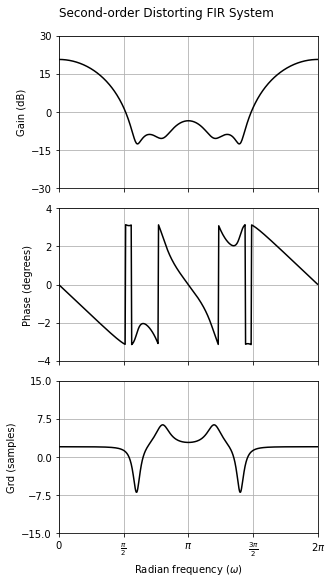

In [3]:
theta1 = .6*np.pi
theta2 = .8*np.pi
r1 = .9
r2 = r3 = 1.25

z1 = r1*np.exp(1j*theta1)
z2 = np.conj(z1)
z3 = r3*np.exp(1j*theta2)
z4 = np.conj(z3)

# Distorting System:
Zd = np.array([z1, z2, z3, z4])
Pd = np.array([0.,0.,0.,0.])
k = 1
b, a = signal.zpk2tf(Zd,Pd,k)
w, Hd = signal.freqz(b,a,whole=True)
angleHd = np.angle(Hd)
w, grdHd = signal.group_delay((b,a),whole=True)

fig1, axs1 = plt.subplots(3,1, sharex= True,figsize=(4.5,8),constrained_layout=True)
fig1.suptitle('Second-order Distorting FIR System')
axs1[0].plot(w,20*np.log10(abs(Hd)),'k')
axs1[0].set_ylabel('Gain (dB)')
axs1[0].set_ylim([-30, 30])
axs1[0].set_yticks([-30,-15,0,15,30])
axs1[0].grid(True)

axs1[1].plot(w,angleHd,'k')
axs1[1].set_ylim([-4,4])
# axs2[1].set_yticks([-4,-2,0,2,4])
axs1[1].grid()
axs1[1].set_ylabel('Phase (degrees)')

# axs2[2].plot(w/np.pi,grdH)
axs1[2].plot(w,grdHd,'k')
axs1[2].set_ylabel('Grd (samples)')
axs1[2].set_xlabel('Radian frequency '+ r'$(\omega)$')
axs1[2].grid()
axs1[2].set_ylim([-15,15])
axs1[2].set_yticks([-15,-7.5,0,7.5,15])
axs1[2].set_xlim([0, 2*np.pi])
axs1[2].set_xticks([0,np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
axs1[2].set_xticklabels([0, r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']);

### Minimum-Phase System

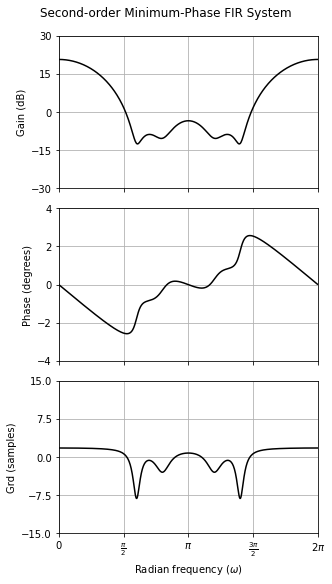

In [4]:
K = r3**2

z5 = 1/r3*np.exp(-1j*theta2)
z6 = np.conj(z5)

Zm = np.array([z1, z2, z5, z6])
# or, equivalently:
# Zm = np.array([z1, z2, 1/np.conj(z3), 1/np.conj(z4)])
Pm = np.array([0., 0., 0., 0.])
b, a = signal.zpk2tf(Zm,Pm,K)
w, Hm = signal.freqz(b,a,whole=True)
angleHm = np.angle(Hm)
w, grdHm = signal.group_delay((b,a),whole=True)

fig2, axs2 = plt.subplots(3,1, sharex= True,figsize=(4.5,8),constrained_layout=True)
fig2.suptitle('Second-order Minimum-Phase FIR System')
axs2[0].plot(w,20*np.log10(abs(Hm)),'k')
axs2[0].set_ylabel('Gain (dB)')
axs2[0].set_ylim([-30, 30])
axs2[0].set_yticks([-30,-15,0,15,30])
axs2[0].grid(True)

axs2[1].plot(w,angleHm,'k')
axs2[1].set_ylim([-4,4])
# axs[1].set_yticks([-4,-2,0,2,4])
axs2[1].grid()
axs2[1].set_ylabel('Phase (degrees)')

# axs[2].plot(w/np.pi,grdH)
axs2[2].plot(w,grdHm,'k')
axs2[2].set_ylabel('Grd (samples)')
axs2[2].set_xlabel('Radian frequency '+ r'$(\omega)$')
axs2[2].grid()
axs2[2].set_ylim([-15,15])
axs2[2].set_yticks([-15,-7.5,0,7.5,15])
axs2[2].set_xlim([0, 2*np.pi])
axs2[2].set_xticks([0,np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
axs2[2].set_xticklabels([0, r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']);

### All-pass System

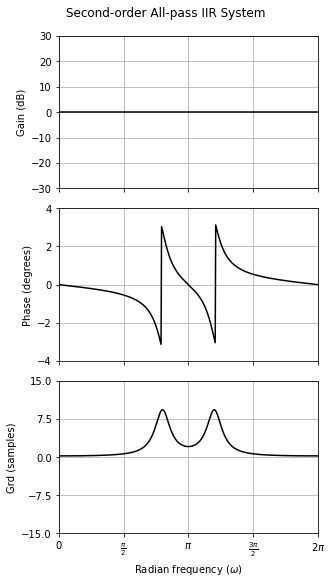

In [5]:
p1 = 1/r2*np.exp(1j*theta2)
p2 = np.conj(p1)
z1 = 1/np.conj(p1)
z2 = np.conj(z1)
K = p1*p2
Pa = np.array([p1, p2])
Za = np.array([z1, z2])

b, a = signal.zpk2tf(Za,Pa,K)
w, Ha = signal.freqz(b,a,whole=True)
angleHa = np.angle(Ha)
w, grdHa = signal.group_delay((b,a),whole=True)

fig3, axs3 = plt.subplots(3,1, sharex= True,figsize=(4.5,8),constrained_layout=True)
fig3.suptitle('Second-order All-pass IIR System')
axs3[0].plot(w,20*np.log10(abs(Ha)),'k')
axs3[0].set_ylabel('Gain (dB)')
axs3[0].set_ylim([-30, 30])
axs3[0].grid(True)

axs3[1].plot(w,angleHa,'k')
axs3[1].set_ylim([-4,4])
# axs3[1].set_yticks([-4,-2,0,2,4])
axs3[1].grid()
axs3[1].set_ylabel('Phase (degrees)')

# axs[2].plot(w/np.pi,grdH)
axs3[2].plot(w,grdHa,'k')
axs3[2].set_ylabel('Grd (samples)')
axs3[2].set_xlabel('Radian frequency '+ r'$(\omega)$')
axs3[2].grid()
axs3[2].set_ylim([-15,15])
axs3[2].set_yticks([-15,-7.5,0,7.5,15])
axs3[2].set_xlim([0, 2*np.pi])
axs3[2].set_xticks([0,np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
axs3[2].set_xticklabels([0, r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']);

### Pole-Zero Plots

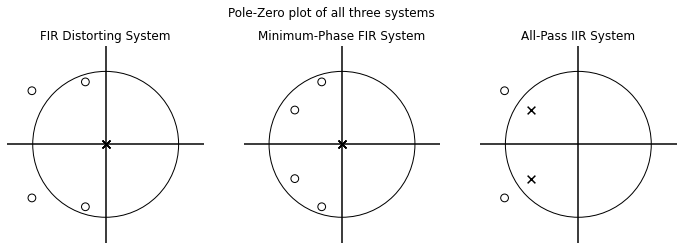

In [6]:
fig4, axs4 = plt.subplots(1,3, figsize = (12,4))
fig4.suptitle('Pole-Zero plot of all three systems', fontsize=12);
fig4.patch.set_visible(False)

axs4[0].add_patch(mpatches.Circle((0, 0), radius=1, edgecolor='k', facecolor='None'))
axs4[0].scatter(np.real(Zd), np.imag(Zd),s=60, marker='o', edgecolor='k', facecolor='none')
axs4[0].scatter(np.real(Pd), np.imag(Pd),s=60, marker='x', color='k')
axs4[0].set_aspect('equal')
axs4[0].axhline(0, color='k')
axs4[0].axvline(0, color='k')
axs4[0].axis('off')
axs4[0].set_title('FIR Distorting System')
axs4[0].set_xlim(-1.35,1.35)
axs4[0].set_ylim(-1.35,1.35)

axs4[1].add_patch(mpatches.Circle((0, 0), radius=1, edgecolor='k', facecolor='None'))
axs4[1].scatter(np.real(Zm), np.imag(Zm),s=60, marker='o', edgecolor='k', facecolor='none')
axs4[1].scatter(np.real(Pm), np.imag(Pm),s=60, marker='x', color='k')
axs4[1].set_aspect('equal')
axs4[1].axhline(0, color='k')
axs4[1].axvline(0, color='k')
axs4[1].axis('off')
axs4[1].set_xlim(-1.35,1.35)
axs4[1].set_ylim(-1.35,1.35)
axs4[1].set_title('Minimum-Phase FIR System')

axs4[2].add_patch(mpatches.Circle((0, 0), radius=1, edgecolor='k', facecolor='None'))
axs4[2].scatter(np.real(Za), np.imag(Za),s=60, marker='o', edgecolor='k', facecolor='none')
axs4[2].scatter(np.real(Pa), np.imag(Pa),s=60, marker='x', color='k')
axs4[2].set_aspect('equal')
axs4[2].axhline(0, color='k')
axs4[2].axvline(0, color='k')
axs4[2].axis('off')
axs4[2].set_xlim(-1.35,1.35)
axs4[2].set_ylim(-1.35,1.35)
axs4[2].set_title('All-Pass IIR System');